<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_1_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#!pip install -U albumentations
!pip install torch_lr_finder -q
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [ ]:
!git clone https://github.com/RashiTech/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 160 (delta 6), reused 0 (delta 0), pack-reused 148
Receiving objects: 100% (160/160), 46.16 KiB | 1.77 MiB/s, done.
Resolving deltas: 100% (88/88), done.


# Unet class is imported

In [ ]:
from main_repo.models import unet
from main_repo.models.unet import UNet

# Import Other fuctions

In [ ]:
from main_repo import train_test, utils
from main_repo.utils import *

from main_repo.train_test import *

# Assign device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
from torchsummary import summary
view_model = UNet(in_channels = 3, out_channels = 3).to(device)
summary(view_model, input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          36,928
       BatchNorm2d-5         [-1, 64, 128, 128]             128
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
  ContractingBlock-8  [[-1, 64, 64, 64], [-1, 64, 128, 128]]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
           Conv2d-12          [-1, 128, 64, 64]         147,584
      BatchNorm2d-13          [-1, 128, 64, 64]             256
             ReLU-14      

In [ ]:
trainset,trainloader,testset,testloader = tl_ts_mod_unet()

100%|██████████| 791918971/791918971 [00:26<00:00, 29453856.11it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 16192349.66it/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


# Show sample images and Load dataset

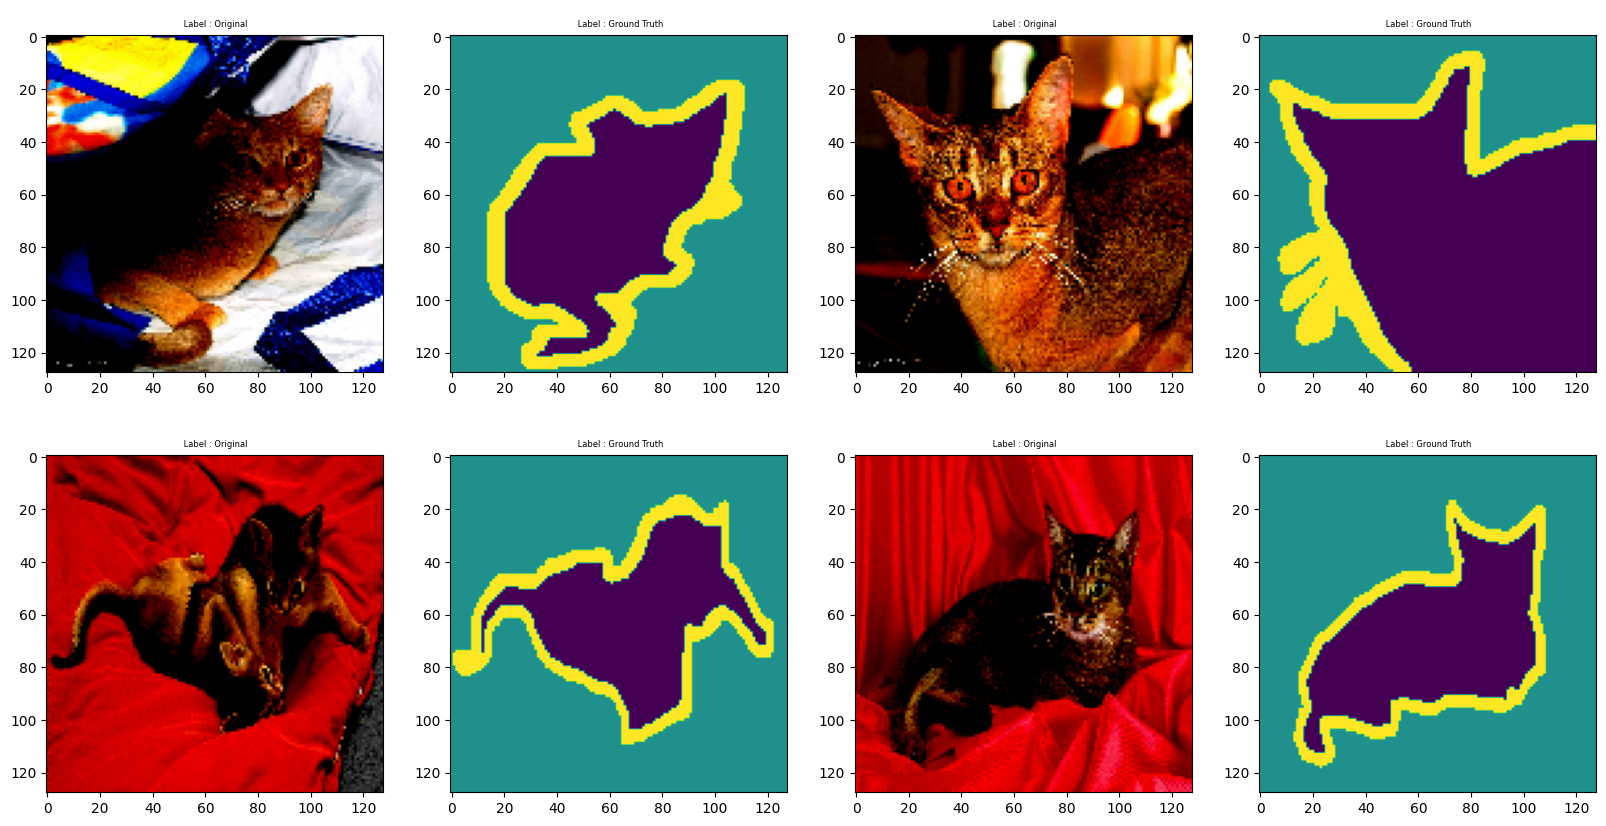

In [ ]:
show_sample_unet(trainset)

#MP+Tr+BCE

In [ ]:
model = UNet(in_channels = 3, out_channels = 3).to(device)

In [ ]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=ler_rate)


In [ ]:
model_tr1, train_losses1, test_losses1 = fit_model_unet(
                                                model=model,
                                                device=device,
                                                trainloader=trainloader,
                                                testloader=None,
                                                criterion = nn.BCEWithLogitsLoss(), #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None

                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.04it/s]


Training Loss=58.75596183538437 Accuracy=80.44436264038086

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:36<00:00,  3.11it/s]


Training Loss=38.99243822693825 Accuracy=90.97817611694336

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.06it/s]


Training Loss=31.492938861250877 Accuracy=94.98937606811523

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.08it/s]


Training Loss=28.281444922089577 Accuracy=97.02908325195312

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.08it/s]


Training Loss=26.281290650367737 Accuracy=98.36634826660156

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=24.806042432785034 Accuracy=99.38306617736816

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.06it/s]


Training Loss=23.24355436861515 Accuracy=100.4114933013916

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.05it/s]


Training Loss=22.558949053287506 Accuracy=100.82693862915039

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=20.985900551080704 Accuracy=101.91903114318848

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=20.788477048277855 Accuracy=102.03268241882324

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=19.945331752300262 Accuracy=102.5477180480957

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=19.35162851214409 Accuracy=102.98611259460449

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.05it/s]


Training Loss=18.376307234168053 Accuracy=103.54911804199219

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]


Training Loss=17.37232856452465 Accuracy=104.1950569152832

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.07it/s]

Training Loss=16.960052326321602 Accuracy=104.45858383178711


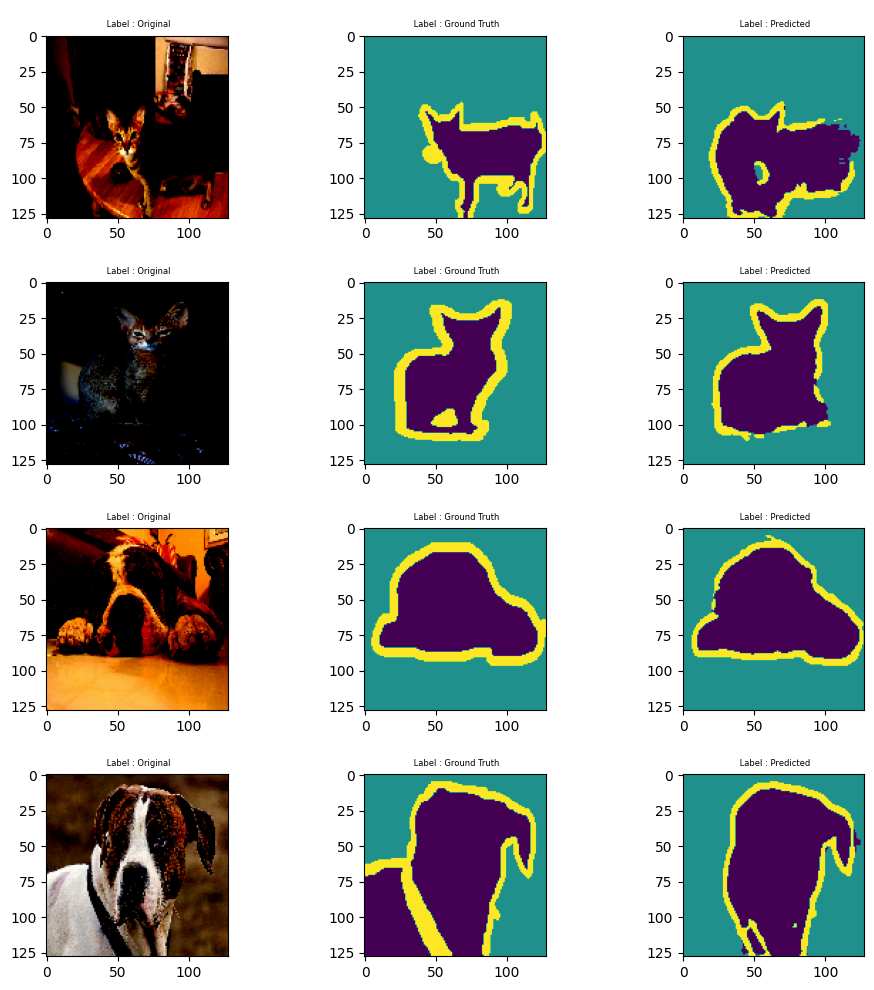

In [ ]:
show_sample_output_unet(model_tr1,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

## Display Validation Accuracy & Loss

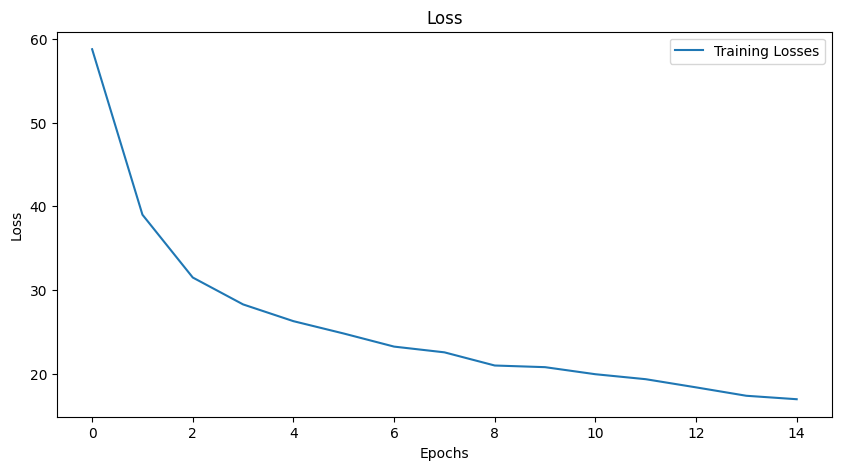

In [ ]:
plot_acc_loss_unet(train_losses1)

# MP+Tr+Dice Loss

In [ ]:
model2 = UNet(in_channels = 3, out_channels = 3).to(device)

In [ ]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model2.parameters(), lr=ler_rate)

In [ ]:
model_tr2, train_losses2, test_losses2 = fit_model_unet(
                                                model=model2,
                                                device=device,
                                                trainloader=trainloader,
                                                testloader=None,
                                                criterion = unet_dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None




                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:37<00:00,  3.06it/s]


Training Loss=-7986.926946282387 Accuracy=54.28627586364746

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  3.03it/s]


Training Loss=-3753.2073974609375 Accuracy=19.9542236328125

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.95it/s]


Training Loss=-4251.892742156982 Accuracy=16.81302261352539

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.97it/s]


Training Loss=-4553.643272399902 Accuracy=15.143205642700195

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.98it/s]


Training Loss=-4817.769584655762 Accuracy=13.806468963623047

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.97it/s]


Training Loss=-5089.0288162231445 Accuracy=12.523872375488281

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.99it/s]


Training Loss=-5438.858581542969 Accuracy=11.249221801757812

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.99it/s]


Training Loss=-5793.030799865723 Accuracy=10.390983581542969

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.97it/s]


Training Loss=-6156.393249511719 Accuracy=9.939105987548828

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.98it/s]


Training Loss=-6631.632583618164 Accuracy=9.306253433227539

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.97it/s]


Training Loss=-7174.113670349121 Accuracy=8.873689651489258

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.97it/s]


Training Loss=-7939.37935256958 Accuracy=8.105491638183594

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:38<00:00,  2.95it/s]


Training Loss=-8863.428909301758 Accuracy=8.003866195678711

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.93it/s]


Training Loss=-10272.93578338623 Accuracy=7.7357940673828125

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.95it/s]


Training Loss=-12857.204284667969 Accuracy=7.491123199462891


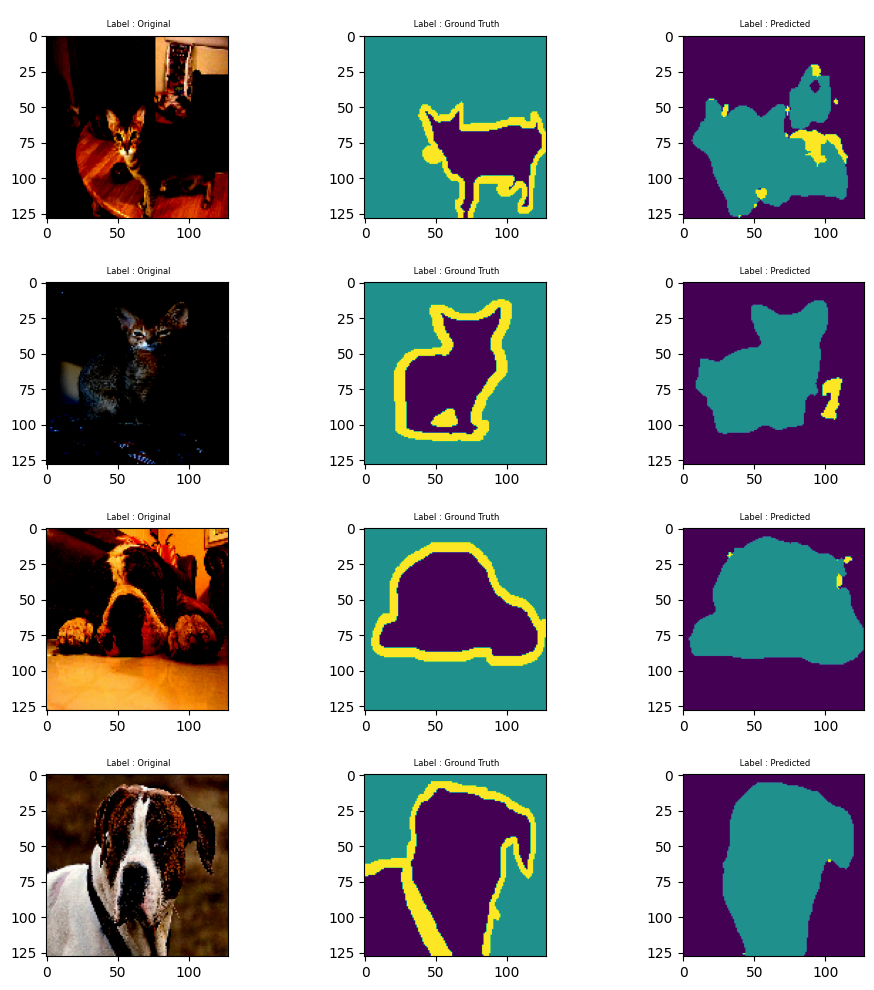

In [ ]:
show_sample_output_unet(model_tr2,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

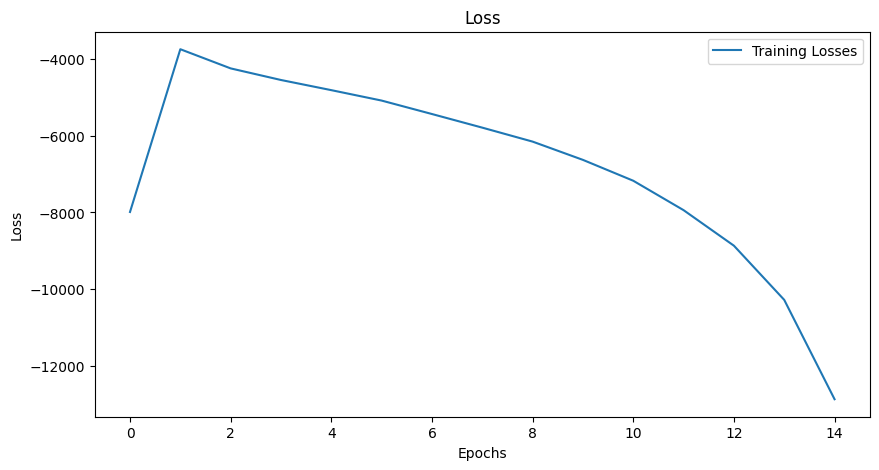

In [ ]:
plot_acc_loss_unet(train_losses2)

# StrConv+Tr+BCE

In [ ]:
model3 = UNet(in_channels = 3, out_channels = 3,pool='StrConv').to(device)

In [ ]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model3.parameters(), lr=ler_rate)

In [ ]:
model_tr3, train_losses3, test_losses3 = fit_model_unet(
                                                model=model3,
                                                device=device,
                                                trainloader=trainloader,
                                                testloader=None,
                                                criterion = nn.BCEWithLogitsLoss(), #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None

                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.81it/s]


Training Loss=60.93574786186218 Accuracy=78.79696083068848

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.90it/s]


Training Loss=43.090557903051376 Accuracy=87.6413516998291

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=36.30071797966957 Accuracy=91.46700096130371

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.88it/s]


Training Loss=32.25245440006256 Accuracy=94.28389739990234

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=29.48386123776436 Accuracy=96.19440269470215

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=27.847404062747955 Accuracy=97.34525299072266

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=26.290481850504875 Accuracy=98.35680961608887

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=25.45150290429592 Accuracy=98.95802879333496

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=24.888604685664177 Accuracy=99.35092163085938

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=23.811429902911186 Accuracy=100.03082847595215

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=23.143830686807632 Accuracy=100.50480461120605

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=22.49919918179512 Accuracy=100.91278076171875

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=21.782815515995026 Accuracy=101.44179153442383

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=21.13689611852169 Accuracy=101.80472183227539

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=20.638121217489243 Accuracy=102.0980110168457


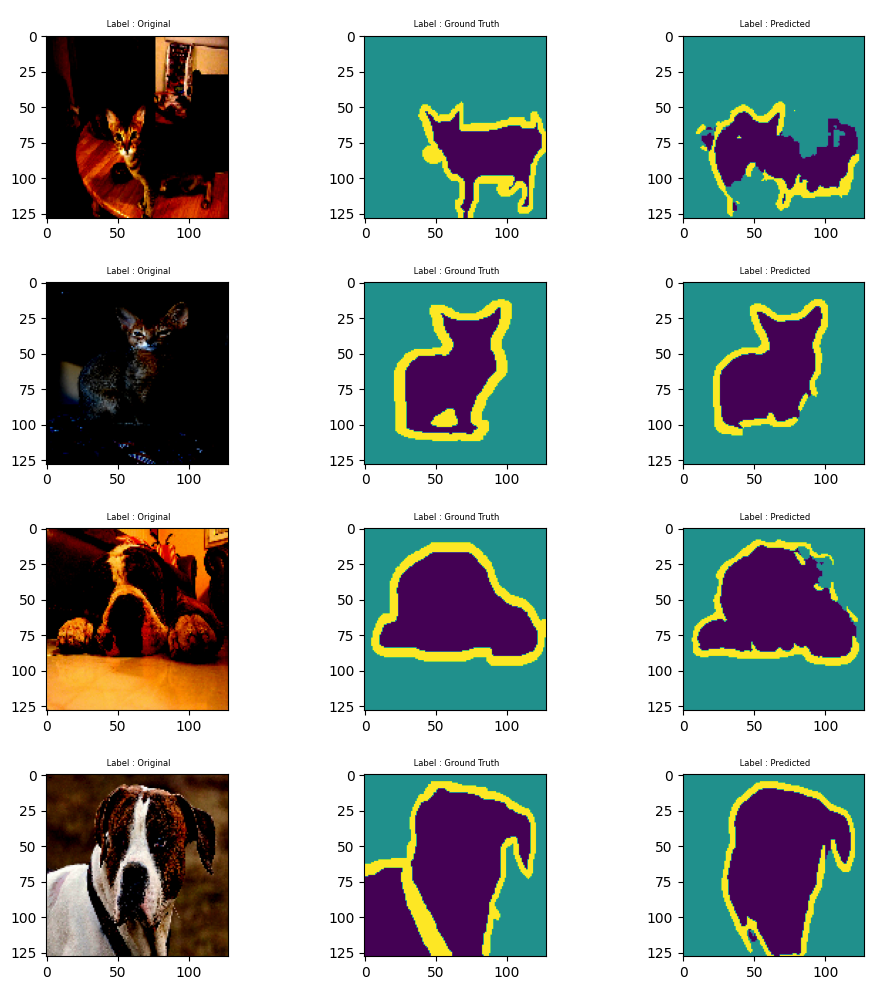

In [ ]:
show_sample_output_unet(model_tr3,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

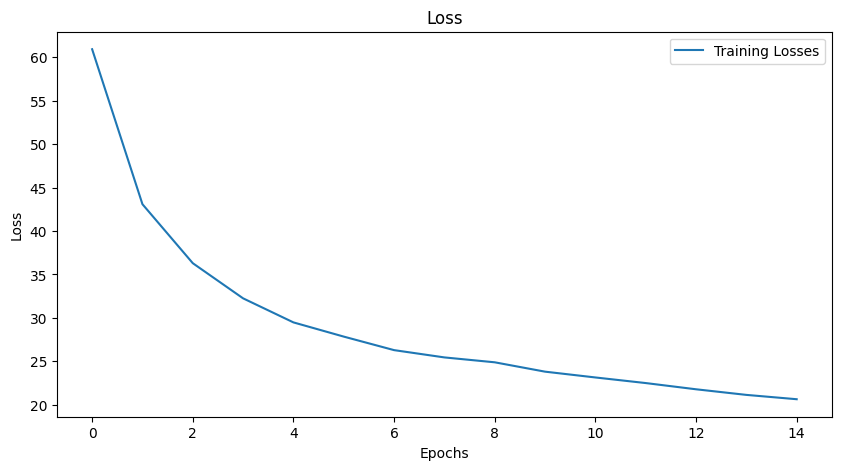

In [ ]:
plot_acc_loss_unet(train_losses3)

# StrConv+Ups+Dice Loss

In [ ]:
model4 = UNet(in_channels = 3, out_channels = 3, mode='upsample',pool='StrConv').to(device)

In [ ]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model4.parameters(), lr=ler_rate)

In [ ]:
model_tr4, train_losses4, test_losses4 = fit_model_unet(
                                                model=model4,
                                                device=device,
                                                trainloader=trainloader,
                                                testloader=None,
                                                criterion = unet_dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None,


                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.81it/s]


Training Loss=-1130.5500837564468 Accuracy=52.863595962524414

 EPOCH: 2 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.89it/s]


Training Loss=-3329.8165588378906 Accuracy=19.254383087158203

 EPOCH: 3 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=-5919.942554473877 Accuracy=17.090347290039062

 EPOCH: 4 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.88it/s]


Training Loss=-10301.848229527473 Accuracy=65.90419006347656

 EPOCH: 5 (LR: 0.001)


100%|██████████| 115/115 [00:39<00:00,  2.88it/s]


Training Loss=-1976.8986406326294 Accuracy=80.53865051269531

 EPOCH: 6 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=-2248.500129699707 Accuracy=82.97321510314941

 EPOCH: 7 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.81it/s]


Training Loss=-2454.368537902832 Accuracy=84.98550224304199

 EPOCH: 8 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=-2590.449529647827 Accuracy=86.6468334197998

 EPOCH: 9 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


Training Loss=-2719.361597061157 Accuracy=88.29611206054688

 EPOCH: 10 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.85it/s]


Training Loss=-2835.7986431121826 Accuracy=89.75627136230469

 EPOCH: 11 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=-2922.2674522399902 Accuracy=90.52148818969727

 EPOCH: 12 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.83it/s]


Training Loss=-3037.390380859375 Accuracy=91.56519317626953

 EPOCH: 13 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.87it/s]


Training Loss=-3134.3963203430176 Accuracy=92.21581077575684

 EPOCH: 14 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=-3264.6105823516846 Accuracy=93.24206924438477

 EPOCH: 15 (LR: 0.001)


100%|██████████| 115/115 [00:40<00:00,  2.86it/s]


Training Loss=-3379.034563064575 Accuracy=93.93094062805176


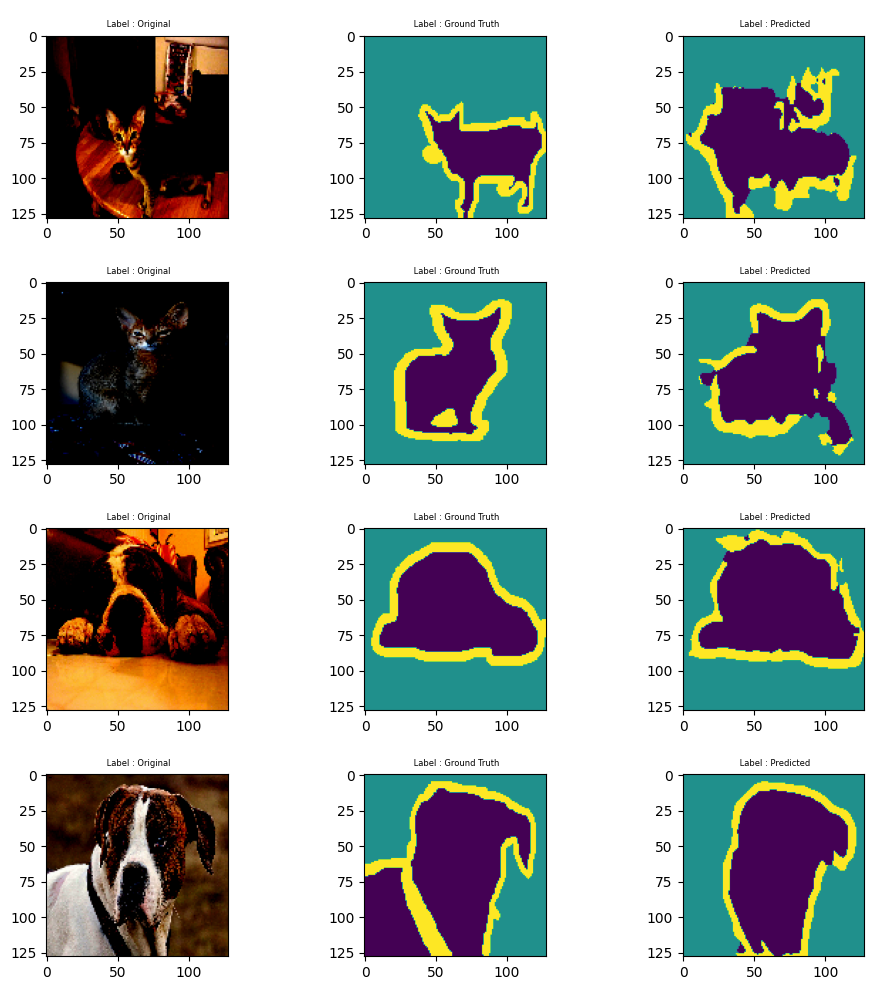

In [ ]:
show_sample_output_unet(model_tr4,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

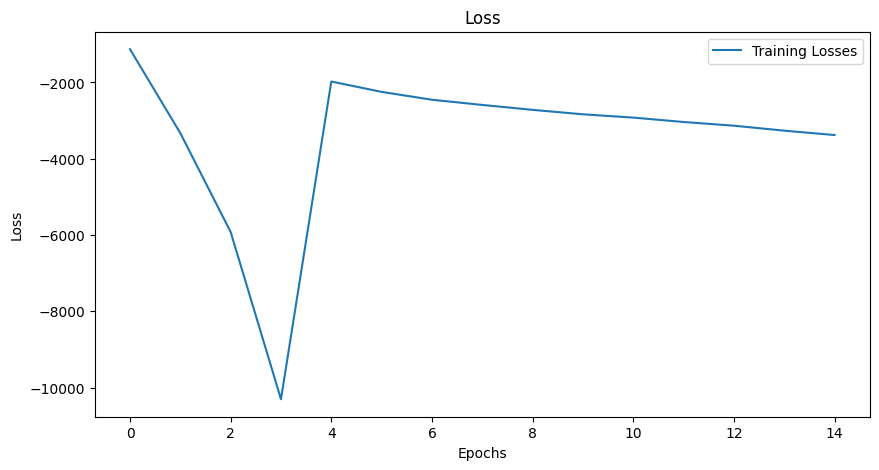

In [ ]:
plot_acc_loss_unet(train_losses4)

# MP+Tr+Dice Loss (multi-class)

In [ ]:
model5 = UNet(in_channels = 3, out_channels = 3).to(device)

In [ ]:
ler_rate = 0.001
optimizer = torch.optim.Adam(model5.parameters(), lr=ler_rate)

In [ ]:
model_tr5, train_losses5, test_losses5 = fit_model_unet(
                                                model=model5,
                                                device=device,
                                                trainloader=trainloader,
                                                testloader=None,
                                                criterion = dice_loss, #dice_loss, #nn.BCEWithLogitsLoss(), #BCELoss(),nn.CrossEntropyLoss
                                                EPOCHS=15,
                                                optimizer=optimizer,
                                                scheduler=None,


                                            )


 EPOCH: 1 (LR: 0.001)


  0%|          | 0/115 [00:00<?, ?it/s]


RuntimeError: ignored

In [ ]:
show_sample_output_unet(model_tr5,testloader,device,image_no=4)
plt.tight_layout()
plt.show()

In [ ]:
plot_acc_loss_unet(train_losses5)